# Low Absorbing Samples

**Scott Prahl**

**July 2024**

Low absorbing samples have a bunch of issues.  We will explore these in this notebook.

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import iadpython as iad
import subprocess

%config InlineBackend.figure_format = 'retina'


def mc_lost_scalar(mua, b, beam, port, t, n=1, t_slide=0, n_slide=1):
    mus = b / t - mua
    if mus < 0:
        mus = 0
    g = 0
    photons = 1000000

    a = mus / (mus + mua)

    command = ["mc_lost"]

    command.append("-m")
    command.append("-a %.5f" % a)
    command.append("-b %.5f" % b)
    command.append("-g %.5f" % g)
    command.append("-a %.5f" % a)
    command.append("-n %.5f" % n)
    command.append("-N %.5f" % n_slide)
    command.append("-p %d " % photons)
    command.append("-B %.5f" % beam)
    command.append("-P %.5f" % port)
    command.append("-t %.5f" % t)
    command.append("-T %.5f" % t_slide)

    command_str = " ".join(command)

    try:
        result = subprocess.run(command, shell=False, check=True, capture_output=True, text=True)
    except subprocess.CalledProcessError as e:
        print("Standard Error:", e.stderr)

    x = result.stdout.split()
    ur1_lost, ut1_lost, uru_lost, utu_lost = x[-4:]

    return ur1_lost, ut1_lost, uru_lost, utu_lost


def mc_lost(mua, b, beam, port, t, n=1, t_slide=0, n_slide=1):
    if isinstance(mua, np.ndarray):
        ur1_lost = np.zeros_like(mua)
        ut1_lost = np.zeros_like(mua)
        uru_lost = np.zeros_like(mua)
        utu_lost = np.zeros_like(mua)
        for i in range(len(mua)):
            ur1_lost[i], ut1_lost[i], uru_lost[i], utu_lost[i] = mc_lost_scalar(
                mua[i], b, beam, port, t, n, t_slide, n_slide
            )

    elif isinstance(b, np.ndarray):
        ur1_lost = np.zeros_like(b)
        ut1_lost = np.zeros_like(b)
        uru_lost = np.zeros_like(b)
        utu_lost = np.zeros_like(b)
        for i in range(len(b)):
            ur1_lost[i], ut1_lost[i], uru_lost[i], utu_lost[i] = mc_lost_scalar(
                mua, b[i], beam, port, t, n, t_slide, n_slide
            )

    elif isinstance(beam, np.ndarray):
        ur1_lost = np.zeros_like(beam)
        ut1_lost = np.zeros_like(beam)
        uru_lost = np.zeros_like(beam)
        utu_lost = np.zeros_like(beam)
        for i in range(len(beam)):
            ur1_lost[i], ut1_lost[i], uru_lost[i], utu_lost[i] = mc_lost_scalar(
                mua, b, beam[i], port, t, n, t_slide, n_slide
            )

    elif isinstance(port, np.ndarray):
        ur1_lost = np.zeros_like(port)
        ut1_lost = np.zeros_like(port)
        uru_lost = np.zeros_like(port)
        utu_lost = np.zeros_like(port)
        for i in range(len(port)):
            ur1_lost[i], ut1_lost[i], uru_lost[i], utu_lost[i] = mc_lost_scalar(
                mua, b, beam, port[i], t, n, t_slide, n_slide
            )

    else:
        ur1_lost, ut1_lost, uru_lost, utu_lost = mc_lost_scalar(mua, b, beam, port, t, n, t_slide, n_slide)

    return np.array([ur1_lost, ut1_lost, uru_lost, utu_lost])


mc_lost_scalar(0.01, 0.1, 5, 10, 1)

mc_lost(0.01, np.array([0.1, 1, 2]), 5, 10, 1)

array([[0.00328, 0.00316, 0.00108],
       [0.00328, 0.00342, 0.00109],
       [0.01809, 0.05067, 0.04999],
       [0.15324, 0.0742 , 0.04684]])

## No spheres

### True Reflection and Transmission for Samples

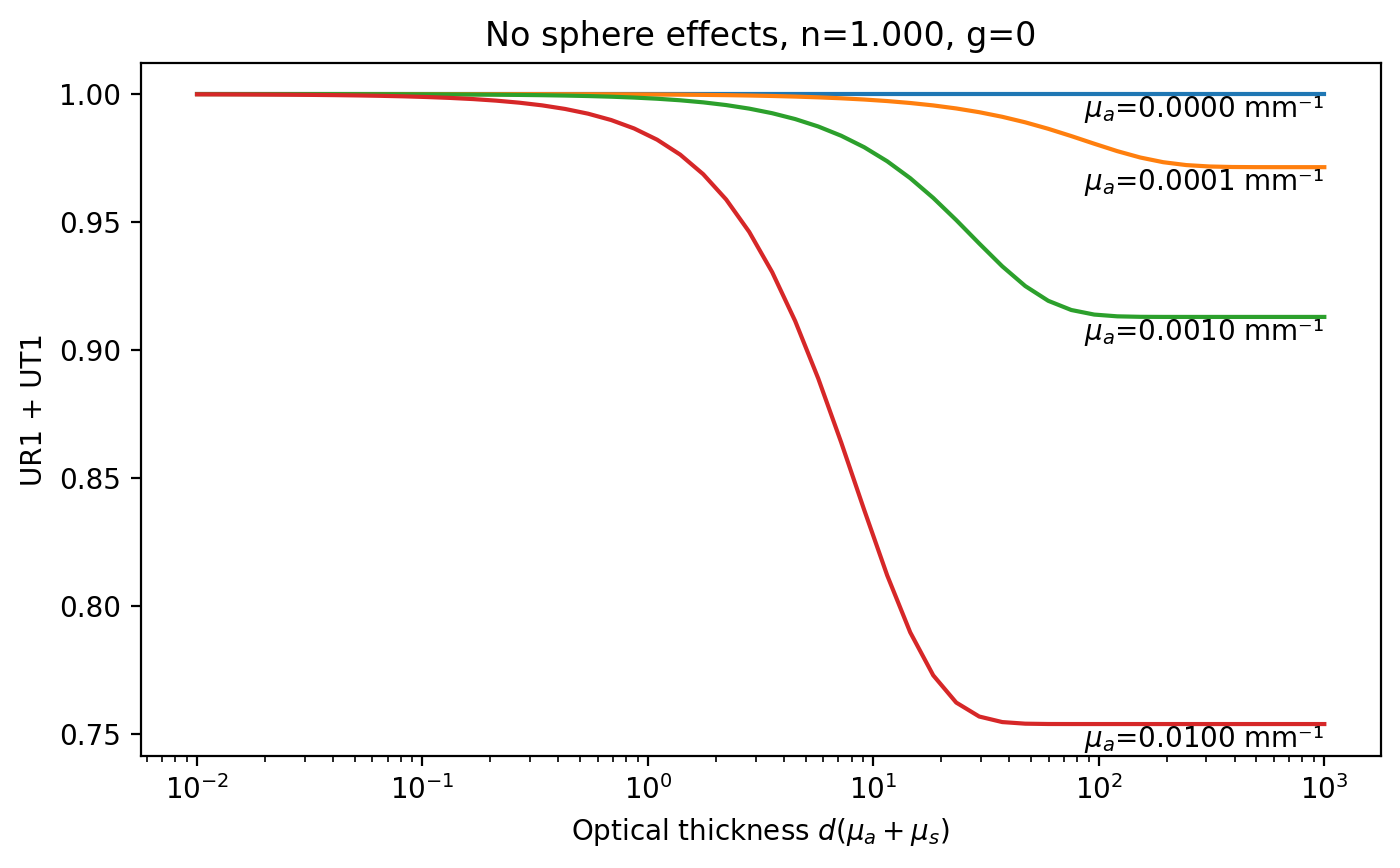

In [33]:
n = 1
bb = np.linspace(-2, 3, 50)
b = 10**bb
mus = 1

mua = 0
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
plt.semilogx(b, ur1 + ut1, label=s)
plt.text(b[-1], ur1[-1] + ut1[-1], s, ha="right", va="top")

mua = 0.0001
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
plt.semilogx(b, ur1 + ut1, label=s)
plt.text(b[-1], ur1[-1] + ut1[-1], s, ha="right", va="top")

mua = 0.001
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
plt.semilogx(b, ur1 + ut1, label=s)
plt.text(b[-1], ur1[-1] + ut1[-1], s, ha="right", va="top")

mua = 0.01
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
plt.semilogx(b, ur1 + ut1, label=s)
plt.text(b[-1], ur1[-1] + ut1[-1], s, ha="right", va="top")

plt.ylabel("UR1 + UT1")
plt.xlabel(R"Optical thickness $d(\mu_a+\mu_s)$")
plt.title("No sphere effects, n=%.3f, g=0" % n)
plt.show()

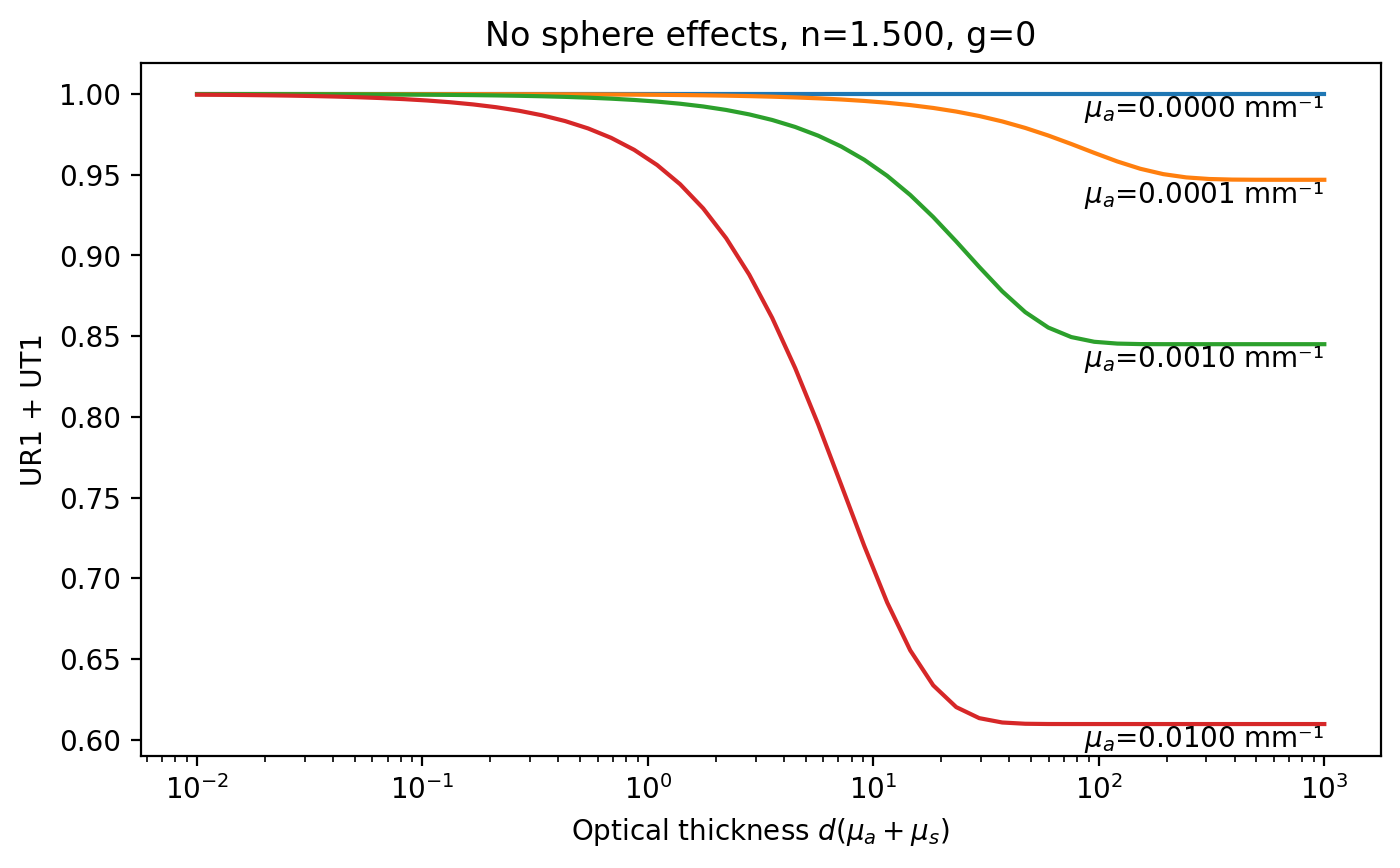

In [32]:
n = 1.5
bb = np.linspace(-2, 3, 50)
b = 10**bb
mus = 1

mua = 0
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
plt.semilogx(b, ur1 + ut1, label=s)
plt.text(b[-1], ur1[-1] + ut1[-1], s, ha="right", va="top")

mua = 0.0001
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
plt.semilogx(b, ur1 + ut1, label=s)
plt.text(b[-1], ur1[-1] + ut1[-1], s, ha="right", va="top")

mua = 0.001
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
plt.semilogx(b, ur1 + ut1, label=s)
plt.text(b[-1], ur1[-1] + ut1[-1], s, ha="right", va="top")

mua = 0.01
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
plt.semilogx(b, ur1 + ut1, label=s)
plt.text(b[-1], ur1[-1] + ut1[-1], s, ha="right", va="top")

plt.ylabel("UR1 + UT1")
plt.xlabel(R"Optical thickness $d(\mu_a+\mu_s)$")
plt.title("No sphere effects, n=%.3f, g=0" % n)
plt.show()

## One sphere

### $M_R$ + $M_T$ for Samples

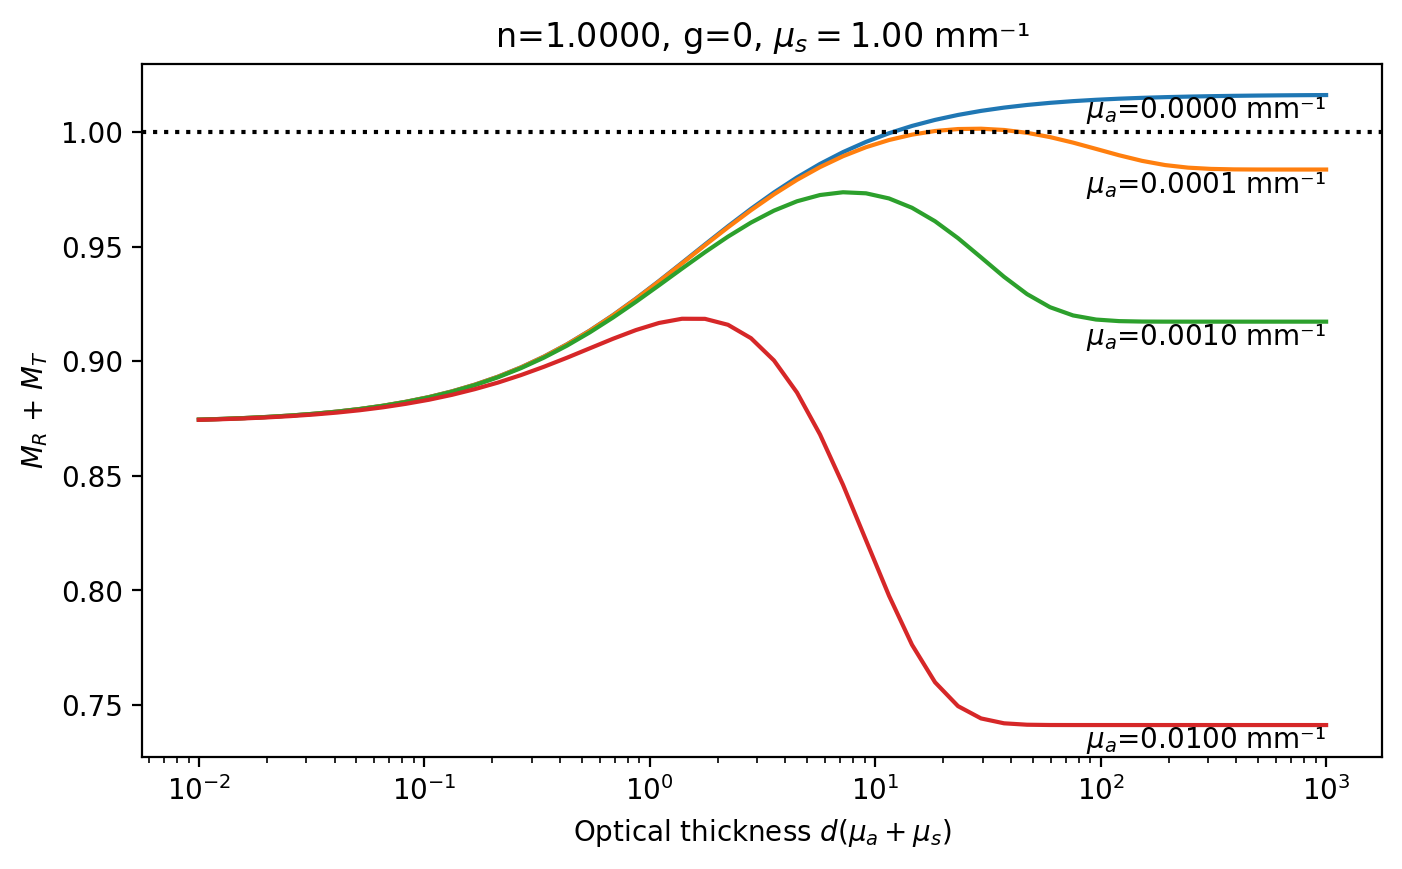

In [40]:
n = 1.0
bb = np.linspace(-2, 3, 50)
b = 10**bb
mus = 1

d_sphere = 25.4 * 4  # mm
d_sample = 25.4 / 2  # mm
d_third = 25.4 / 2  # mm
d_detector = 2  # mm
r_wall = 0.98
r_std = 0.9

sph = iad.Sphere(d_sphere, d_sample, d_third=d_third, d_detector=d_detector, r_std=r_std)
sph.r_wall = r_wall
sph.r_third = r_std

mua = 0
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
mr = sph.MR(ur1, uru)
mt = sph.MR(ut1, uru)
plt.semilogx(b, mr + mt, label=s)
plt.text(b[-1], mr[-1] + mt[-1], s, ha="right", va="top")

mua = 0.0001
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
mr = sph.MR(ur1, uru)
mt = sph.MR(ut1, uru)
plt.semilogx(b, mr + mt, label=s)
plt.text(b[-1], mr[-1] + mt[-1], s, ha="right", va="top")

mua = 0.001
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
mr = sph.MR(ur1, uru)
mt = sph.MR(ut1, uru)
plt.semilogx(b, mr + mt, label=s)
plt.text(b[-1], mr[-1] + mt[-1], s, ha="right", va="top")

mua = 0.01
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
mr = sph.MR(ur1, uru)
mt = sph.MR(ut1, uru)
plt.semilogx(b, mr + mt, label=s)
plt.text(b[-1], mr[-1] + mt[-1], s, ha="right", va="top")

plt.ylabel("$M_R$ + $M_T$")
plt.xlabel(R"Optical thickness $d(\mu_a+\mu_s)$")
plt.title(R"n=%.4f, g=0, $\mu_s=$%.2f mm⁻¹" % (n, mus))
plt.axhline(1, color="black", ls=":")
plt.show()

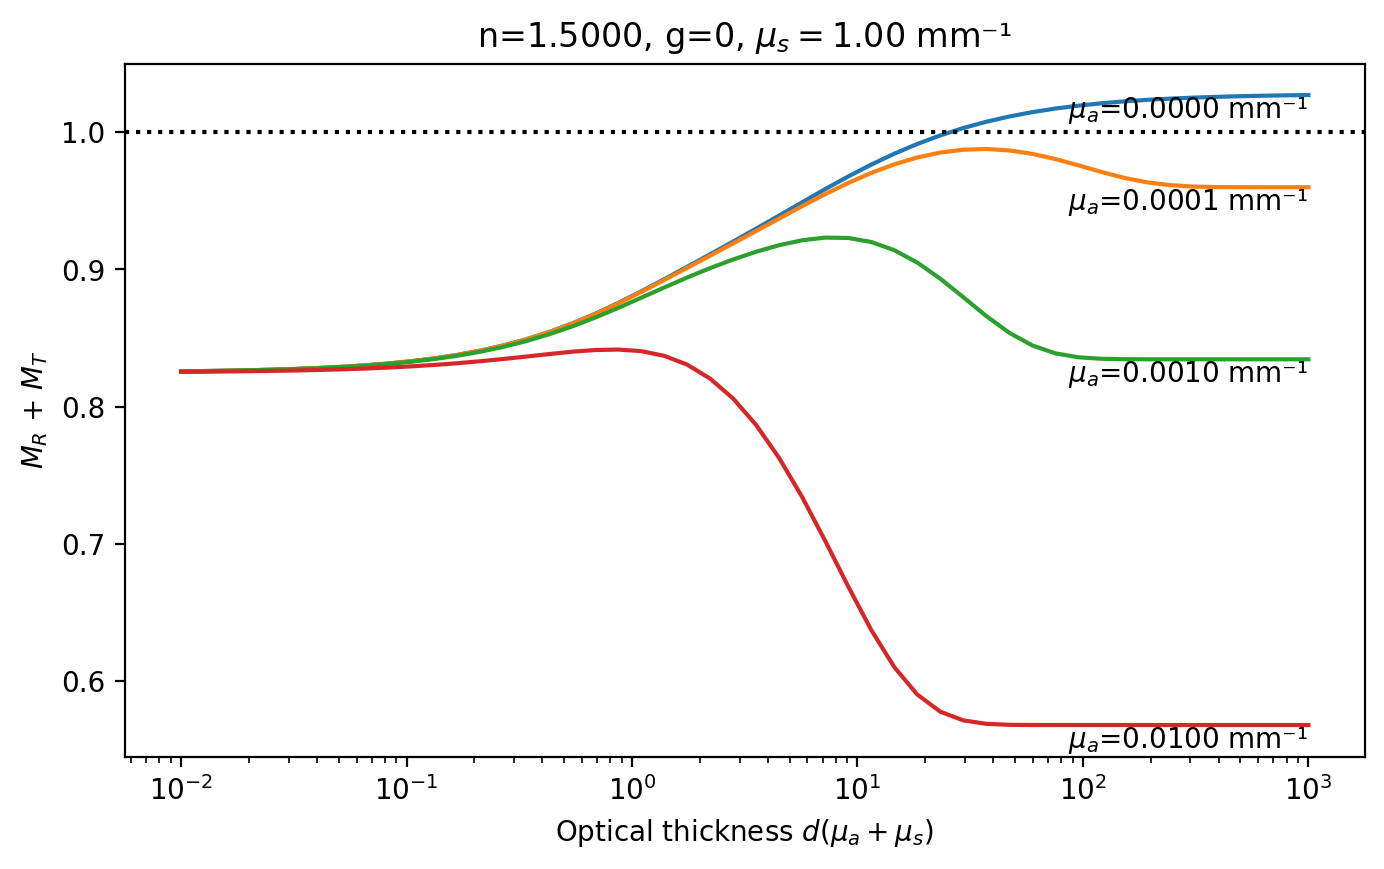

In [39]:
n = 1.5
bb = np.linspace(-2, 3, 50)
b = 10**bb
mus = 1

d_sphere = 25.4 * 4  # mm
d_sample = 25.4 / 2  # mm
d_third = 25.4 / 2  # mm
d_detector = 2  # mm
r_std = 0.9

sph = iad.Sphere(d_sphere, d_sample, d_third=d_third, d_detector=d_detector, r_std=r_std)
sph.r_third = r_std

mua = 0
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
mr = sph.MR(ur1, uru)
mt = sph.MR(ut1, uru)
plt.semilogx(b, mr + mt, label=s)
plt.text(b[-1], mr[-1] + mt[-1], s, ha="right", va="top")

mua = 0.0001
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
mr = sph.MR(ur1, uru)
mt = sph.MR(ut1, uru)
plt.semilogx(b, mr + mt, label=s)
plt.text(b[-1], mr[-1] + mt[-1], s, ha="right", va="top")

mua = 0.001
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
mr = sph.MR(ur1, uru)
mt = sph.MR(ut1, uru)
plt.semilogx(b, mr + mt, label=s)
plt.text(b[-1], mr[-1] + mt[-1], s, ha="right", va="top")

mua = 0.01
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1, ut1, uru, utu = iad.Sample(a=mus / (mua + mus), b=b, n=n).rt()
mr = sph.MR(ur1, uru)
mt = sph.MR(ut1, uru)
plt.semilogx(b, mr + mt, label=s)
plt.text(b[-1], mr[-1] + mt[-1], s, ha="right", va="top")

plt.ylabel("$M_R$ + $M_T$")
plt.xlabel(R"Optical thickness $d(\mu_a+\mu_s)$")
plt.title(R"n=%.4f, g=0, $\mu_s=$%.2f mm⁻¹" % (n, mus))
plt.axhline(1, color="black", ls=":")
plt.show()

## Lost Light

### No index

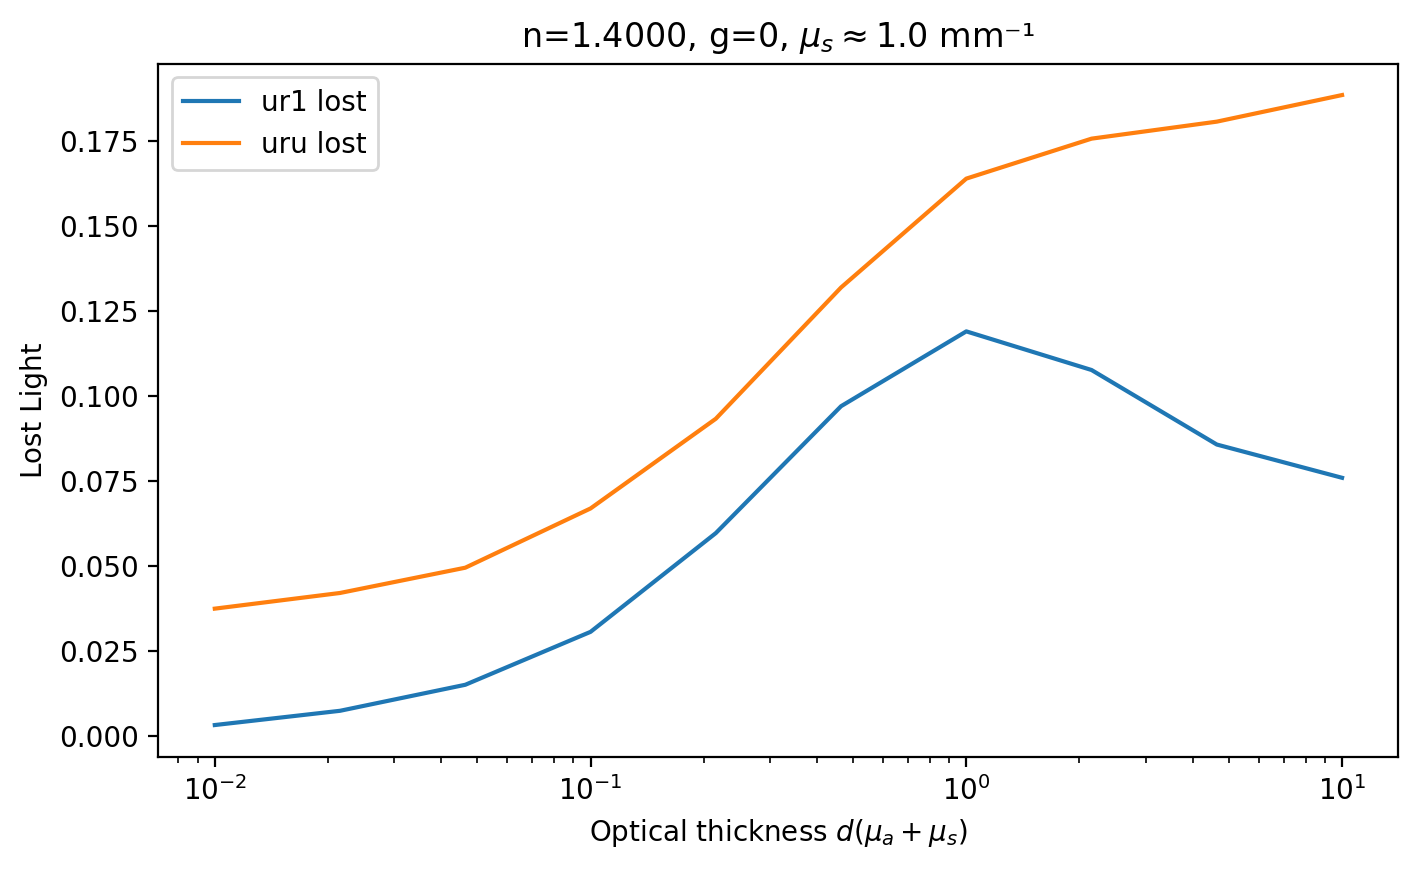

In [71]:
bb = np.linspace(-2, 1, 10)
b = 10**bb

beam = 4
port = 12.7
t_slide = 1
n_slide = 1.5
t = 2
n = 1.4

mua = 0
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1_lost, ut1, uru_lost, utu = mc_lost(mua, b, beam, port, t, n, t_slide, n_slide)

plt.semilogx(b, ur1_lost, label="ur1 lost")
plt.semilogx(b, uru_lost, label="uru lost")
plt.legend()

plt.ylabel("Lost Light")
plt.xlabel(R"Optical thickness $d(\mu_a+\mu_s)$")
plt.title(R"n=%.4f, g=0, $\mu_s\approx$%.1f mm⁻¹" % (n, 1.0))
plt.show()

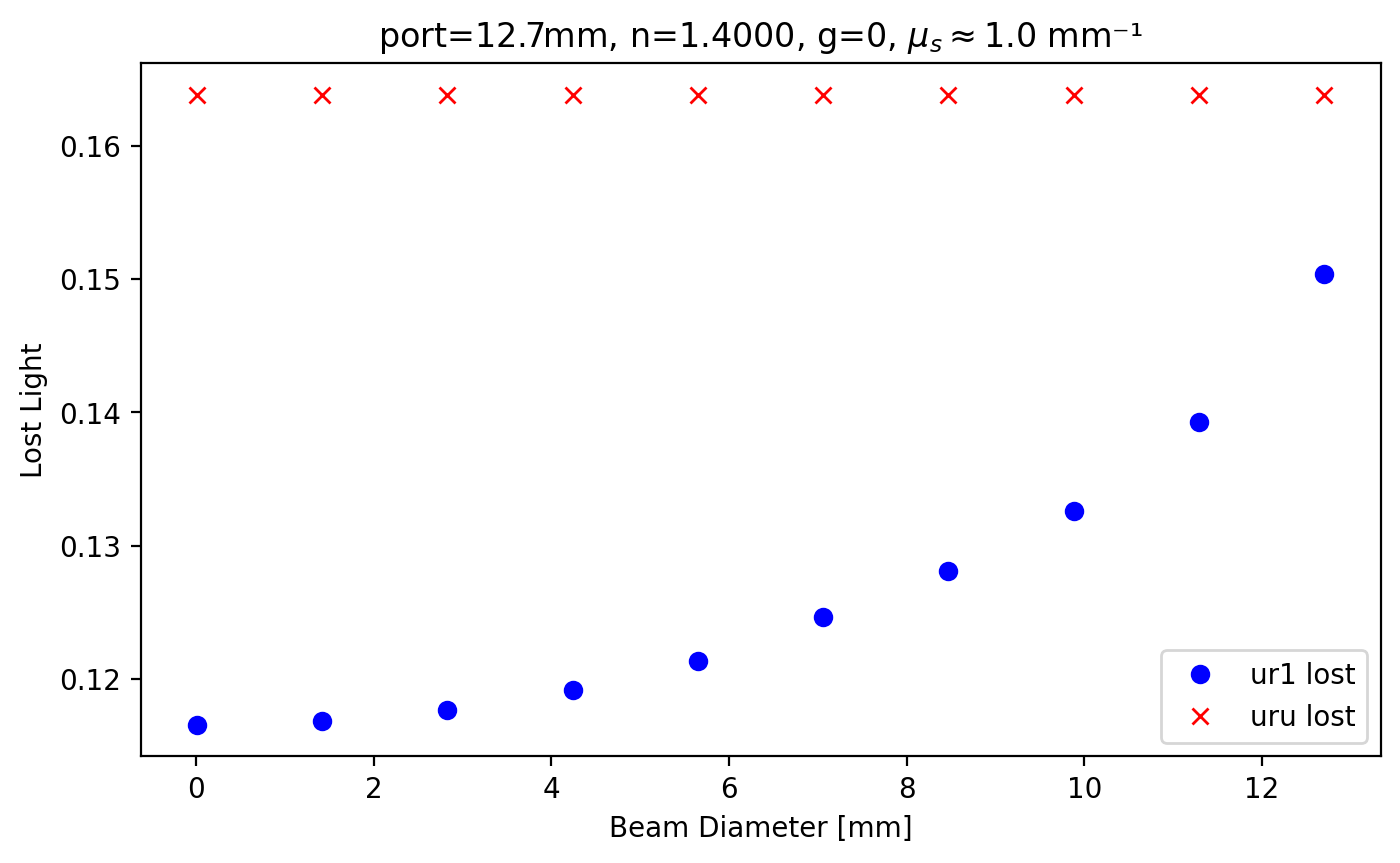

In [95]:
b = 1
port = 12.7
beam = np.linspace(0.01, port, 10)
t_slide = 1
n_slide = 1.5
t = 2
n = 1.4

mua = 0
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1_lost, ut1, uru_lost, utu = mc_lost(mua, b, beam, port, t, n, t_slide, n_slide)

plt.plot(beam, ur1_lost, "bo", label="ur1 lost")
plt.plot(beam, uru_lost, "rx", label="uru lost")
plt.legend()

plt.ylabel("Lost Light")
plt.xlabel(R"Beam Diameter [mm]")
plt.title(R"port=%.1fmm, n=%.4f, g=0, $\mu_s\approx$%.1f mm⁻¹" % (port, n, 1.0))
plt.show()

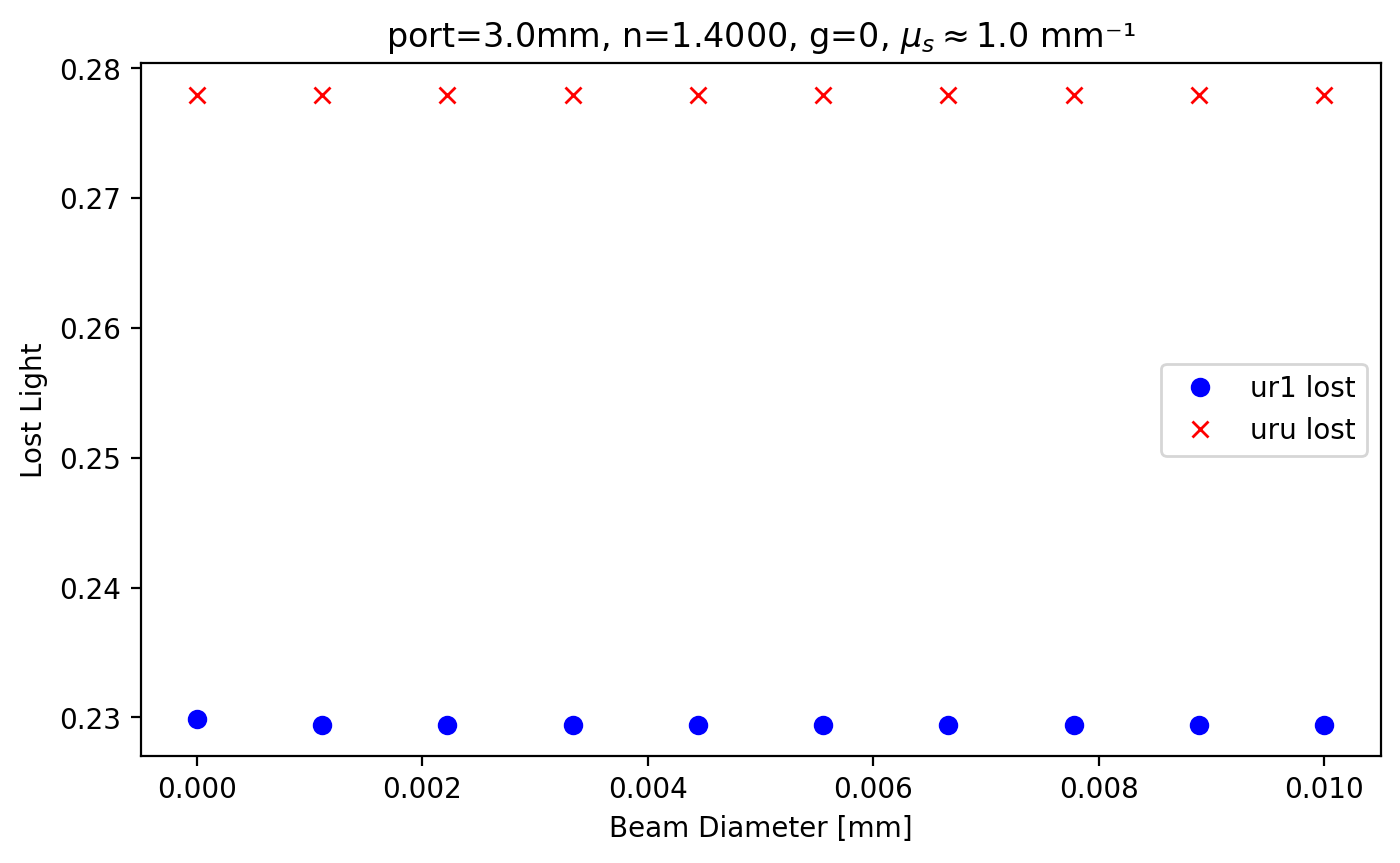

In [98]:
b = 1
port = 3
beam = np.linspace(0, 0.01, 10)
t_slide = 1
n_slide = 1.5
t = 2
n = 1.4

mua = 0
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1_lost, ut1, uru_lost, utu = mc_lost(mua, b, beam, port, t, n, t_slide, n_slide)

plt.plot(beam, ur1_lost, "bo", label="ur1 lost")
plt.plot(beam, uru_lost, "rx", label="uru lost")
plt.legend()

plt.ylabel("Lost Light")
plt.xlabel(R"Beam Diameter [mm]")
plt.title(R"port=%.1fmm, n=%.4f, g=0, $\mu_s\approx$%.1f mm⁻¹" % (port, n, 1.0))
plt.show()

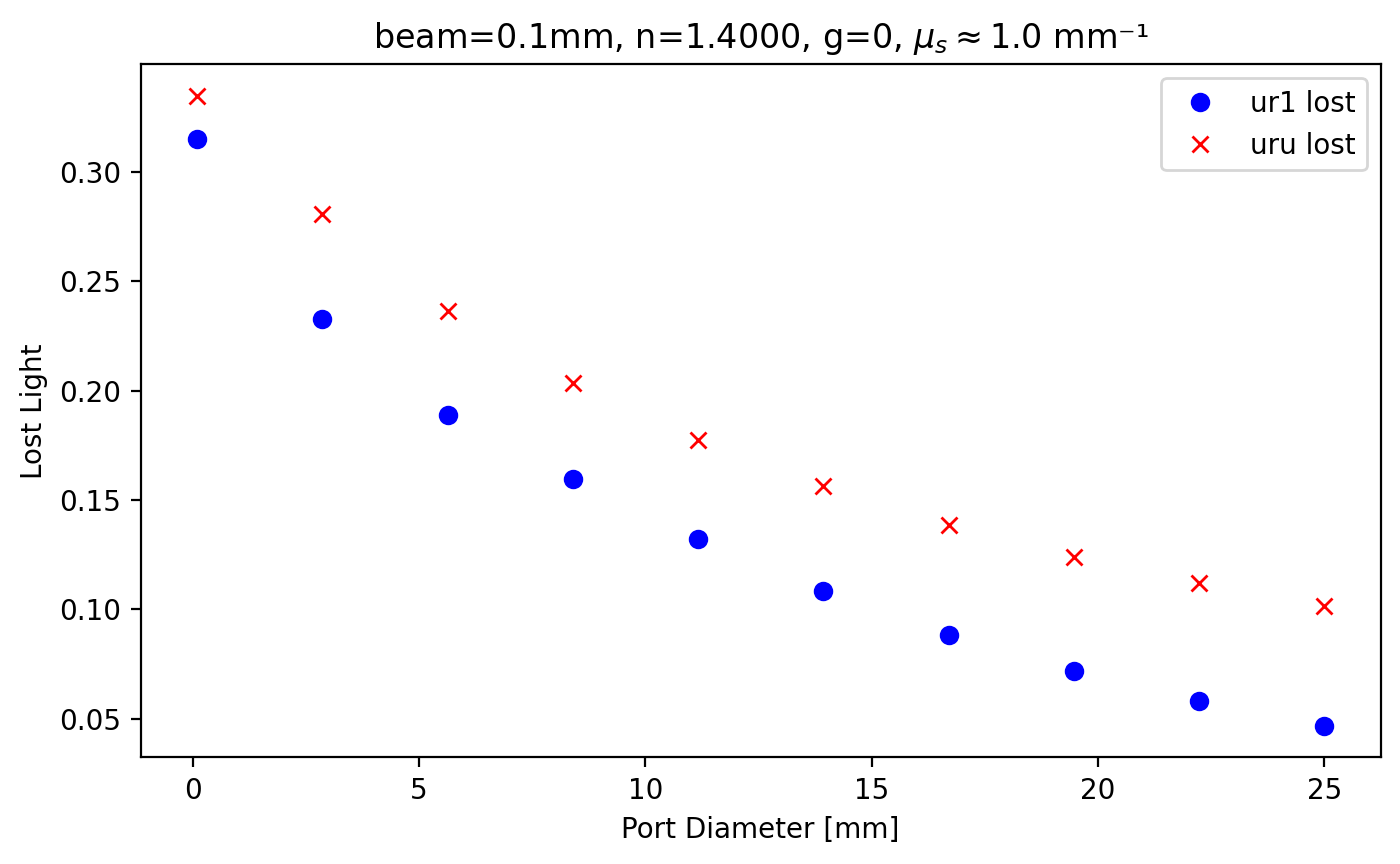

In [99]:
b = 1
beam = 0.1
port = np.linspace(0.1, 25, 10)
t_slide = 1
n_slide = 1.5
t = 2
n = 1.4

mua = 0
s = R"$\mu_a$=%.4f mm⁻¹" % mua
ur1_lost, ut1, uru_lost, utu = mc_lost(mua, b, beam, port, t, n, t_slide, n_slide)

plt.plot(port, ur1_lost, "bo", label="ur1 lost")
plt.plot(port, uru_lost, "rx", label="uru lost")
plt.legend()

plt.ylabel("Lost Light")
plt.xlabel(R"Port Diameter [mm]")
plt.title(R"beam=%.1fmm, n=%.4f, g=0, $\mu_s\approx$%.1f mm⁻¹" % (beam, n, 1.0))
plt.show()

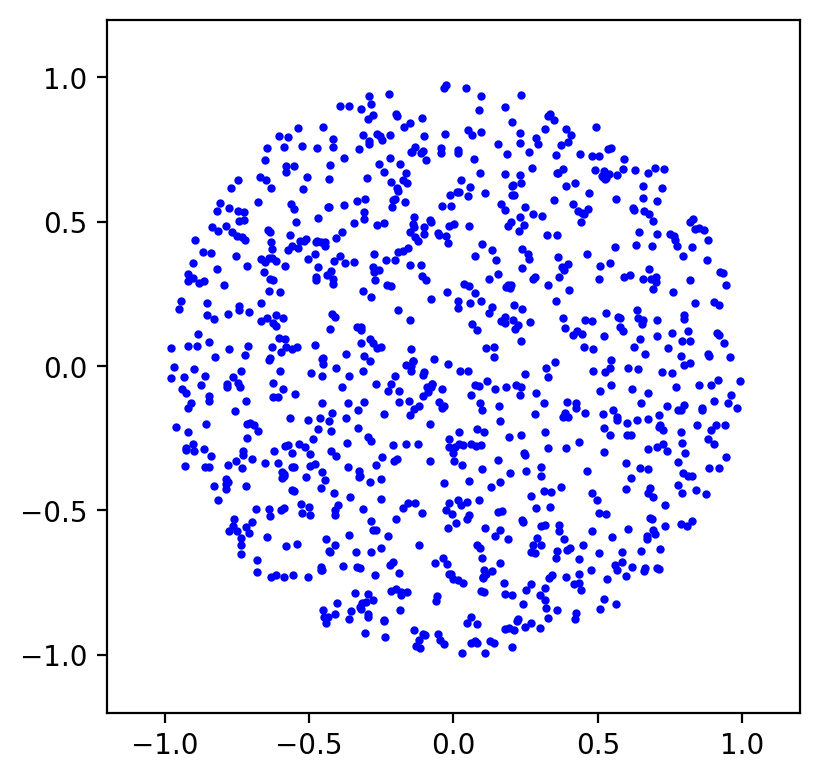

In [91]:
import random


def launch_point(beam_radius, t_slide):
    x, y, z = 0, 0, -t_slide

    if beam_radius > 0:  # uniform distribution over a disk
        while True:
            a = random.uniform(-1, 1)
            b = random.uniform(-1, 1)
            if a * a + b * b <= 1:
                break

        x = a * beam_radius
        y = b * beam_radius

    return x, y, z


# Example usage
beam_radius = 1.0
t_slide = 0.5
for i in range(1000):
    x, y, z = launch_point(beam_radius, t_slide)
    plt.plot(x, y, "ob", markersize="2")

plt.gca().set_aspect("equal")
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.show()

In [106]:
help(random.random)

Help on built-in function random:

random() method of random.Random instance
    random() -> x in the interval [0, 1).



In [136]:
from mpl_toolkits.mplot3d import Axes3D


def diffuse_direction():
    w = np.sqrt(random.random())
    phi = 2.0 * np.pi * random.random()
    u = np.cos(phi) * np.sqrt(1 - w * w)
    v = np.sin(phi) * np.sqrt(1 - w * w)
    return u, v, w


def draw_circle(radius=1, color="blue"):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    plt.plot(x, y, color=color, lw=0.5)


def draw_sphere(ax, sphere_radius=1, color="gray"):
    phi = np.linspace(0, np.pi, 30)  # polar angle
    theta = np.linspace(0, 2 * np.pi, 30)  # azimuthal angle
    phi, theta = np.meshgrid(phi, theta)

    # Convert spherical coordinates to Cartesian coordinates for the sphere's surface
    x = sphere_radius * np.sin(phi) * np.cos(theta)
    y = sphere_radius * np.sin(phi) * np.sin(theta)
    z = sphere_radius * np.cos(phi)

    # Plot the wireframe
    ax.plot_wireframe(x, y, z, color=color, lw=0.5)

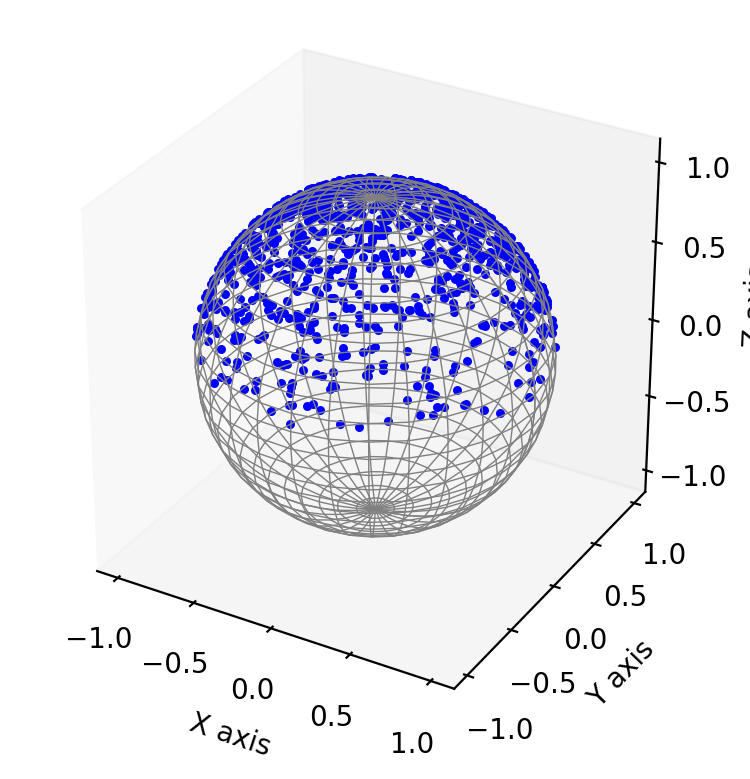

In [114]:
sphere_radius = 1
d_sample = 1
sphere = iad.Sphere(2 * sphere_radius, d_sample)

plt.figure()
ax = plt.axes(projection="3d")
draw_sphere(ax, sphere_radius, "gray")

for i in range(1000):
    x, y, z = diffuse_direction()
    ax.scatter(x, y, z, color="blue", s=5)
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")
ax.set_box_aspect([1, 1, 1])
ax.grid(False)
plt.show()

In [117]:
def uniform():
    """
    Generate a point uniformly distributed on the surface of a sphere.

    Using Gaussian distribution for all three coordinates ensures a
    uniform distribution on the surface of the sphere. See

    https://math.stackexchange.com/questions/1585975

    Returns:
        (x, y, z) for a random point on the sphere's surface.
    """
    while True:
        x = random.gauss()
        y = random.gauss()
        z = random.gauss()
        r = np.sqrt(x**2 + y**2 + z**2)
        if r > 0:
            return np.array([x, y, abs(z)]) / r

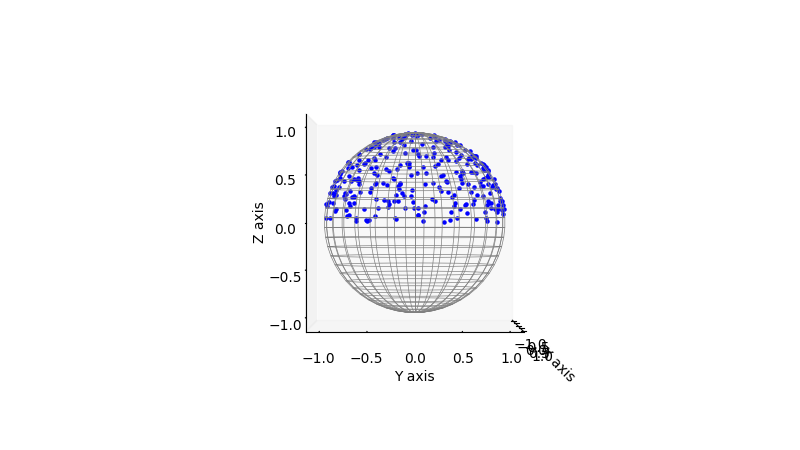

In [151]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import ipympl

%matplotlib widget

# Assuming iad and necessary functions are defined/imported


# Example function for drawing a sphere
def draw_sphere2(ax, radius, color):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color=color, alpha=0.3)


def diffuse_direction():
    w = np.sqrt(random.uniform(0, 1))
    phi = 2.0 * np.pi * random.uniform(0, 1)
    u = np.cos(phi) * np.sqrt(1 - w * w)
    v = np.sin(phi) * np.sqrt(1 - w * w)
    return u, v, w


# Setting up the plot
sphere_radius = 1
d_sample = 1
# sphere = iad.Sphere(2*sphere_radius, d_sample)  # Example sphere creation, assuming iad is defined

plt.figure()
ax = plt.axes(projection="3d")
ax.view_init(elev=0, azim=0)  # or azim=180

draw_sphere(ax, sphere_radius, "gray")

for i in range(300):
    x, y, z = uniform4()
    ax.scatter(x, y, z, color="blue", s=5)

ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")
ax.set_box_aspect([1, 1, 1])
ax.grid(False)
plt.show()

In [125]:
def diffuse3():
    phi = np.arccos(random.uniform(-1, 1))
    theta = 2 * np.pi * random.uniform(0, 1)
    x = np.cos(phi) * np.cos(theta)
    y = np.cos(phi) * np.sin(theta)
    z = np.sin(phi)
    return x, y, abs(z)

In [150]:
def uniform_disk():
    """
    Generate a point uniformly distributed on a unit disk.

    This function generates and returns a point (x, y) that is uniformly distributed
    over the area of a unit disk centered at the origin (0, 0). The unit disk is
    defined as the set of all points (x, y) such that x^2 + y^2 <= 1. The method
    uses rejection sampling, where random points are generated within the square
    that bounds the unit disk, and only points that fall within the disk are accepted.

    Returns:
        tuple of (float, float, float): A point (x, y) where x and y are the
        coordinates of the point uniformly distributed within the unit disk,
        and s is the square of the distance from the origin to this point.
    """
    s = 2
    while s > 1:
        x = 2 * random.random() - 1
        y = 2 * random.random() - 1
        s = x * x + y * y
    return x, y, s


def uniform4():
    """
    Generate a point uniformly distributed on a spherical cap.

    This function generates points uniformly distributed over a spherical cap,
    defined by a specified sagitta (height of the cap from its base to the top)
    and sphere radius. The spherical cap can be positioned either at the top or
    bottom of the sphere. The method utilizes principles from uniform distribution
    on a disk and transforms these points to the spherical cap geometry.

    WARNING: The cap assumed to be at the top of a sphere. Nothing is done to rotate
    the points so they align with the center of the cap!

    The algorithm to generate a random point on a spherical cap is adapted from
    http://marc-b-reynolds.github.io/distribution/2016/11/28/Uniform.html

    Args:
        sagitta: The height of the spherical cap from its base to the top.
        sphere_radius: The radius of the sphere with the cap.

    Returns:
        A numpy array of a random point on the spherical cap surface.
    """
    s = 2
    while s > 1:
        ux = random.uniform(-1, 1)
        uy = random.uniform(-1, 1)
        s = ux * ux + uy * uy
    root = np.sqrt(2 - s)
    return ux * root, uy * root, 1 - s